accuracy of Bayes Classifier on validate data:  93.33333333333333 %
accuracy of Bayes Classifier on test data:  97.77777777777777 %


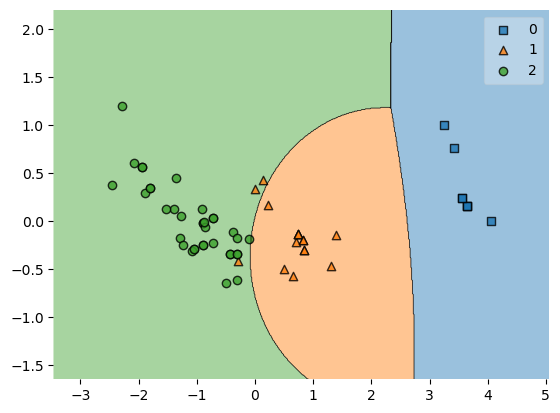

In [3]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import random
import matplotlib.pyplot as pl
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


def train_validate_test_split(ddata, targett, testRation=0.3, validateRatio=0.3):
    tsize = int(testRation * len(ddata))
    vsize = int(validateRatio * len(ddata))
    ddate_test = ddata[0:tsize]
    targett_test = targett[0:tsize]
    ddata_validate = ddata[tsize:vsize + tsize]
    targett_validate = targett[tsize:vsize + tsize]
    ddate_train = ddata[tsize + vsize:]
    targett_train = targett[tsize + vsize:]
    return ddate_train, targett_train, ddate_test, targett_test, ddata_validate, targett_validate

def calculate_accuracy(predicted_y, y):
    cnt = 0
    for i in range(len(y)):
        if predicted_y[i] == y[i]:
            cnt += 1
    return cnt / len(y) * 100


# loading the data
iris = load_iris()
# separating the data from the labels
data = iris.data
target = iris.target
# data processing
index_list = [i for i in range(150)]
random.seed(3)
random.shuffle(index_list)
tmp_data = data
tmp_target = target
for x in range(150):
    tmp_data[x] = data[index_list[x]]
    tmp_target[x] = target[index_list[x]]
data = tmp_data
target = tmp_target

# creating a bayes classifier
nBayes = GaussianNB()
# splitting the data
data_train, target_train, data_test, target_test, data_validate, target_validate = train_validate_test_split(data,
                                                                                                             target,
                                                                                                             0.3, 0.3)
# model fitting
nBayes.fit(data_train, target_train)
# predict on the test data and validate data
predicted_labels_validate = nBayes.predict(data_validate)
predicted_labels_test = nBayes.predict(data_test)
print("accuracy of Bayes Classifier on validate data: ", calculate_accuracy(predicted_labels_validate, target_validate),
      "%")
print("accuracy of Bayes Classifier on test data: ", calculate_accuracy(predicted_labels_test, target_test), "%")
pca = PCA(n_components=2)
x = pca.fit_transform(data_train)
nBayes.fit(x,target_train)
plot_decision_regions(X=x,y=target_train,clf = nBayes)
pl.show()